In [1]:
import pandas as pd
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [2]:
df = df.drop(['area_type', 'society', 'availability', 'balcony'], axis=1)


In [4]:
df.isna()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [5]:
df = df.dropna()


In [6]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\hp\AppData\Local\Temp\ipykernel_5424\4243402212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))


In [8]:
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13246, dtype: int64

In [9]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [10]:
def convert_sqft(x):
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_5424\2708585513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(convert_sqft)


In [11]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [12]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df['location'].value_counts()
df['location'] = df['location'].apply(lambda x: 'other' if location_stats[x] <= 10 else x)
dummies = pd.get_dummies(df['location'])
df = pd.concat([df, dummies.drop('other', axis=1)], axis=1)
df = df.drop('location', axis=1)


C:\Users\hp\AppData\Local\Temp\ipykernel_5424\175409996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: x.strip())
C:\Users\hp\AppData\Local\Temp\ipykernel_5424\175409996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: 'other' if location_stats[x] <= 10 else x)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop(['price', 'size'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R2 Score:", r2_score(y_test, preds))


R2 Score: 0.44952984154035647


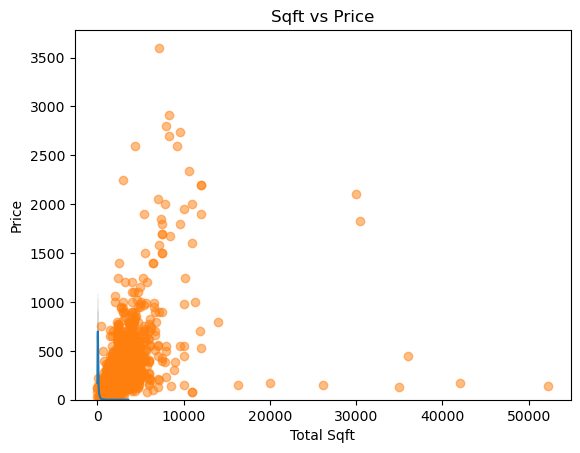

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
sns.histplot(df['price'], kde=True)
plt.title("House Price Distribution")

# Sqft vs Price
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Sqft vs Price")
plt.show()


In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling + gradient descent
model = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01))
])

model.fit(X_train, y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, preds))


R2 Score: 0.4476506136138081


In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R2 Score:", r2_score(y_test, preds))


R2 Score: 0.6154709763712436


In [18]:
# Remove price per sqft outliers
df = df[df['price'] < df['price'].quantile(0.95)]
df = df[df['total_sqft'] < df['total_sqft'].quantile(0.95)]


In [19]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R2 Score:", r2_score(y_test, preds))


R2 Score: 0.6054229188387394


In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R2 Score:", r2_score(y_test, preds))

R2 Score: 0.6002905586409544
